In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from tqdm import tqdm
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import SpectralClustering, AffinityPropagation
from sklearn.metrics import silhouette_score


**Generate sample data**

In [25]:
nb_clusters = 7
X, y_true = make_blobs(n_samples=300, centers=nb_clusters,
                       cluster_std=.80, random_state=0)
print (X.shape)

(300, 2)


**Plot the data**

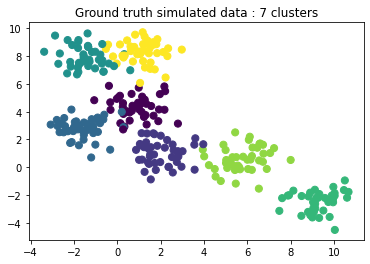

In [26]:
plt.title(f'Ground truth simulated data : {nb_clusters} clusters')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_true);

**Clustering the dataset**

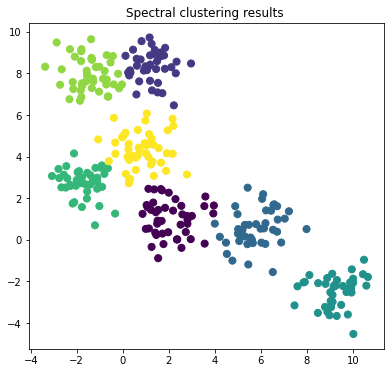

In [27]:
clustering = SpectralClustering(n_clusters=nb_clusters, assign_labels="discretize", random_state=0).fit(X)
y_pred = clustering.labels_
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title(f'Spectral clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred);

**Calculate the cluster goodness**

In [28]:
Sil_score=silhouette_score(X,y_pred)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.5499510276741219


**Generating Moon dataset**

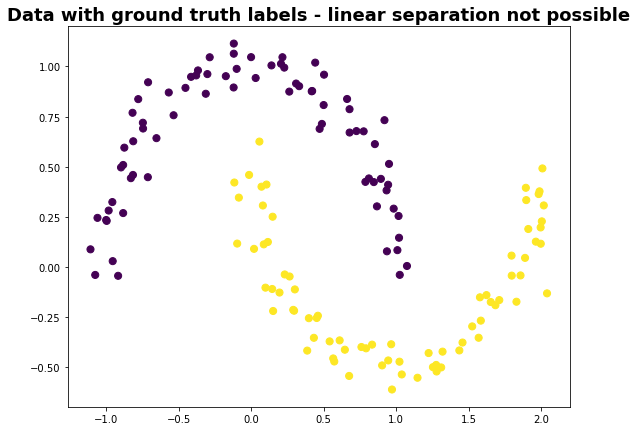

In [29]:
import time
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

**Clustering Moon dataset with K-Means**

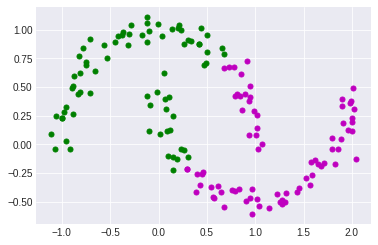

In [30]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import style
style.use("seaborn-darkgrid")
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_mn)
label = kmeans.labels_
colours = ['m.','g.','r.', 'k.']
for i in range(len(X_mn)):
    plot.plot(X_mn[i][0], X_mn[i][1], colours[label[i]], markersize = 10 )

**Clustering Moon dataset with Spectral Clustering**

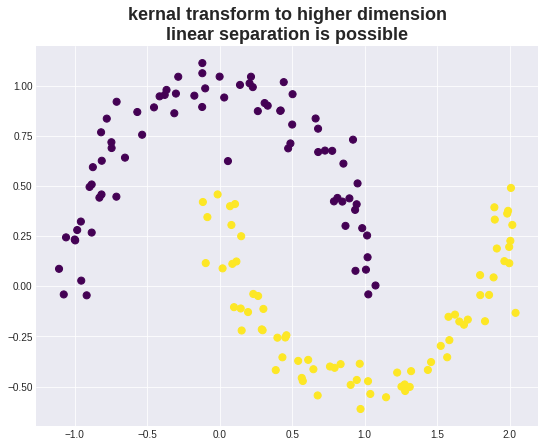

In [31]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

In [11]:
from google.colab import files
uploaded = files.upload()

Saving iris_org.txt to iris_org.txt
Saving 21D_data.txt to 21D_data.txt
Saving 4D_data.txt to 4D_data.txt
Saving 2D_data.txt to 2D_data.txt


**Clustering with iris data set**

In [32]:
read_file=open("iris_org.txt",'r')
read_content= read_file.read()

all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)-1
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  150
Number the features/samples :-  4


**Number of data points and number of features/samples for each data point**

In [37]:
X=np.zeros((No_data_points,No_of_features))
true_label = []
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        X[counter][i]= values[i]
    true_label.append(int(values[No_of_features]))     #
    counter+=1

print (true_label)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


**Training and clustering with Sprectral Clustering**

In [38]:
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


**Calculate the cluster goodness**

In [39]:
Sil_score=silhouette_score(X,labelsS)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.5541608580282847


**Calculate the cluster goodness (Considering true label information)**

In [40]:
ARI=metrics.adjusted_rand_score(true_label, labelsS)
print (ARI)

0.7591987071071522
